# p14 - Solve nonlinear BVP $u_{xx} = exp(u)$, $u(-1)=u(1)=0$ by iteration

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import dot,exp,zeros,linspace,polyval,polyfit,inf
from numpy.linalg import norm
from chebPy import cheb
from scipy.linalg import solve
from matplotlib.pyplot import title,plot

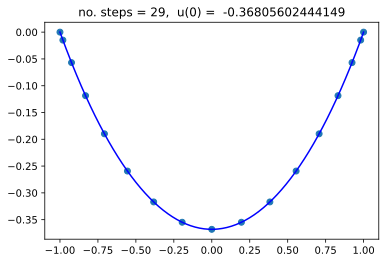

In [3]:
N = 16 # N must be even
D,x = cheb(N)
D2 = dot(D,D)
D2 = D2[1:N,1:N]

u = zeros(N-1)
err = zeros(N-1)
change, it = 1.0, 0

while change > 1.0e-15:
    unew = solve(D2,exp(u))
    change = norm(unew-u, inf)
    u = unew
    it += 1

# Add bounday values to u vector
s = zeros(N+1); s[1:N] = u; u = s;

xx = linspace(-1.0,1.0,201)
uu = polyval(polyfit(x,u,N),xx)    # interpolate grid data

title('no. steps = %d,  u(0) = %18.14f' %(it,u[N//2]) )
plot(x,u,'o',xx,uu,'b');